In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from scipy.misc import imread
# from keras.utils import np_utils
# from numpy.utils import to_categorical
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

/home/renjie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_path = os.path.join(os.getcwd(), '..','data', 'Augments_train')
Original_image_path = os.path.join(data_path, 'Original')
SegMask_path = os.path.join(data_path, 'SegMask_Wound_Bg_oneHot')

In [ ]:
image_datagen = ImageDataGenerator()
mask_datagen = ImageDataGenerator()

In [ ]:
seed = 1

In [ ]:
image_generator = image_datagen.flow_from_directory(Original_image_path,
                                                    (480, 640),
                                                    class_mode=None,
                                                    batch_size=4,
                                                    seed=seed)
mask_generator = mask_datagen.flow_from_directory(SegMask_path,
                                                  (480, 640),
                                                  color_mode='grayscale',
                                                  classes=['BG', 'Wound'],
                                                  class_mode='categorical',
                                                  batch_size=2,
                                                  seed=seed)
train_generator = zip(image_generator, mask_generator)

In [ ]:
(image, mask) = next(train_generator)

In [ ]:
image.shape

In [ ]:
mask[0].shape

In [ ]:
plt.imshow(image[2].astype('uint8'))

In [ ]:
mask[1]

In [ ]:
mask[0][0].shape

In [ ]:
plt.imshow(mask[0][1].reshape(480,640).astype('uint8'))

In [7]:
data_path = os.path.join(os.getcwd(), '..','data', 'Augments_train')
Original_image_path = os.path.join(data_path, 'Original')
# Original_image_names = os.listdir(Original_image_path)
# Original_image_names.sort(key = lambda x:int(x.split('_')[2].split('.')[0]))

SegMask_path = os.path.join(data_path, 'SegMask_Wound_Bg')
# SegMask_names = os.listdir(SegMask_path)
# SegMask_names.sort(key = lambda x:int(x.split('_')[4].split('.')[0]))

In [8]:
def trainGenerator(x_dir, y_dir, batch_size,  seed=1):

    image_datagen = ImageDataGenerator()
    mask_datagen = ImageDataGenerator()

    image_generator = image_datagen.flow_from_directory(x_dir,
                                                        (480, 640),
                                                        class_mode=None,
                                                        batch_size=batch_size,
                                                        seed=seed)
    mask_generator = mask_datagen.flow_from_directory(y_dir,
                                                      (480, 640),
                                                      color_mode='grayscale',
                                                      classes=None,
                                                      class_mode=None,
                                                      batch_size=batch_size,
                                                      seed=seed)
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        print(mask.shape)
        img, mask = img, to_categorical(mask, 2)
        yield (img, mask)

In [9]:
train_generator = trainGenerator(Original_image_path, SegMask_path, 4, 1)

In [11]:
(img,mask) = next(train_generator)

(4, 480, 640, 1)


In [12]:
img.shape

(4, 480, 640, 3)

In [13]:
mask.shape

(4, 480, 640, 2)

In [14]:
test_img = img[0]
test_mask = mask[0]

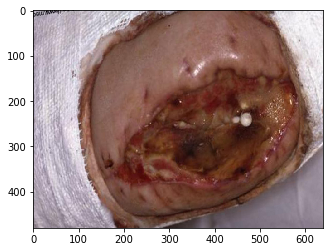

In [15]:
plt.imshow(test_img.astype('uint8'))

In [19]:
test_mask_bg = test_mask[:,:,0]
test_mask_wound = test_mask[:,:,1]

test_mask_bg.shape, test_mask_wound.shape

((480, 640), (480, 640))

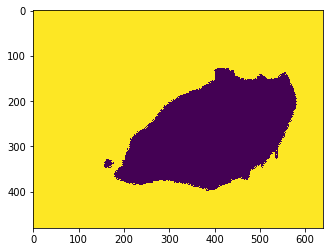

In [20]:
plt.imshow(test_mask_bg)

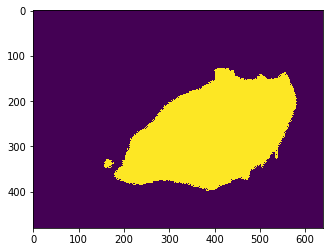

In [21]:
plt.imshow(test_mask_wound)

In [ ]:
images = [imread(os.path.join(Original_image_path, x)) for x in os.listdir(Original_image_path)]

In [ ]:
masks = [to_categorical(np.expand_dims(imread(os.path.join(SegMask_path, x)), axis=2), 2)
         for x in os.listdir(SegMask_path)]

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
model.

In [ ]:
# Testing
list(map(lambda x: x.split('_')[4], SegMask_names)) == list(map(lambda x: x.split('_')[2], Original_image_names)) 

In [ ]:
SegMask_Raw_path = os.path.join(data_path, 'SegMask_Wound_Bg_Raw')
# SegMask_Raw_names = os.listdir(SegMask_Raw_path)[:500]
SegMask_Raw_names = os.listdir(SegMask_Raw_path)[500:]

In [ ]:
SegMasks_Raw = np.array([imread(os.path.join(SegMask_Raw_path, x)) for x in SegMask_Raw_names])

In [ ]:
SegMask_Raw_names[0]

In [ ]:
SegMasks_Raw.shape

In [ ]:
SegMasks_Raw = to_categorical(SegMasks_Raw, 2)

In [ ]:
SegMasks_Raw.shape

In [ ]:
SegMasks_Bg = SegMasks_Raw[:,:,:,0]
SegMasks_Wound = SegMasks_Raw[:,:,:,1]

In [ ]:
SegMasks_Bg.shape, SegMasks_Wound.shape

In [ ]:
num = 1

In [ ]:
print("Seg mask number: ", num)
print("Seg mask name: ", SegMask_Raw_names[num])
print("shapes: {} {}".format(SegMasks_Bg[num].shape, SegMasks_Wound[num].shape))
plt.imshow(SegMasks_Bg[num])

In [ ]:
plt.imshow(SegMasks_Wound[num])

In [ ]:
SegMask_BG_path = os.path.join(SegMask_Raw_path, '..','SegMask_Wound_Bg', 'BG')
SegMask_Wound_path = os.path.join(SegMask_Raw_path, '..','SegMask_Wound_Bg', 'Wound')

In [ ]:
test = imread(os.path.join(SegMask_Wound_path, os.listdir(SegMask_Wound_path)[0]))
test.shape
plt.imshow(test)

In [ ]:
test = imread(os.path.join(SegMask_BG_path, os.listdir(SegMask_BG_path)[0]))
test.shape
plt.imshow(test)

In [ ]:
plt.imshow(test)

In [ ]:
# spliting into different directories
for i in range(len(SegMask_Raw_names)):
    name = SegMask_Raw_names[i]
#     old_name = os.path.join(SegMask_Raw_path, name)
    new_name_BG = os.path.join(SegMask_Raw_path, '..','SegMask_Wound_Bg', 'BG', name)
    new_name_Wound = os.path.join(SegMask_Raw_path, '..', 'SegMask_Wound_Bg', 'Wound', name)
#     print(new_name_BG)
    cv2.imwrite(new_name_BG, SegMasks_Bg[i])
    cv2.imwrite(new_name_Wound, SegMasks_Wound[i])
# os.rename()

# Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_datagen = ImageDataGenerator()
mask_datagen = ImageDataGenerator(preprocessing_function= to_categorical)

In [ ]:
print(Original_image_path)
# print(Original_image_names[0])

In [ ]:
seed = 1

In [ ]:
image_generator = image_datagen.flow_from_directory(Original_image_path, 
                                                    (480, 640),
                                                    class_mode= None,
                                                   seed = seed)
mask_generator = mask_datagen.flow_from_directory(SegMask_path,
                                                 (480,640),
                                                 color_mode = 'grayscale',
                                                 class_mode=None,
                                                 seed = seed)

In [ ]:
train_generator = zip(image_generator, mask_generator)

In [ ]:
(image, mask) = next(train_generator)

In [ ]:
image.shape

In [ ]:
list(mask)[0]

In [ ]:
mask

In [ ]:
plt.imshow(mask[0][0].reshape([480,640]))

In [ ]:
image.shape, mask.shape

In [ ]:
num = 0

In [ ]:
num += 1

In [ ]:
test_image = image[num]
test_image.shape
plt.imshow(test_image.astype('uint8'))

In [ ]:
test_mask = mask[num]
print(test_mask.reshape([480,640]).shape)
plt.imshow(test_mask.reshape([480,640]).astype('uint8'))